In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as 


In [2]:
df = pd.read_csv("housing.csv")

In [3]:
df.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [4]:
df.columns=df.columns.str.lower().str.replace(' ', '_')
strings=list(df.dtypes[df.dtypes=='object'].index)
for col in strings:
    df[col]=df[col].str.lower().str.replace(' ', '_')

In [ ]:
df.

In [5]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [6]:
df.head().T

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41.0,21.0,52.0,52.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0
population,322.0,2401.0,496.0,558.0,565.0
households,126.0,1138.0,177.0,219.0,259.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0
ocean_proximity,near_bay,near_bay,near_bay,near_bay,near_bay


In [7]:
df.ocean_proximity.nunique()

5

In [8]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [15]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(0)

In [16]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [27]:
df['rooms_per_household']= df['total_rooms']/ (df['households'])
df['bedrooms_per_room']= df['total_bedrooms']/ (df['total_rooms'])
df['population_per_household']= df['population']/ (df['households'])

In [28]:
df.isnull().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
above_average               0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

In [9]:
df.ocean_proximity.mode()

0    <1h_ocean
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

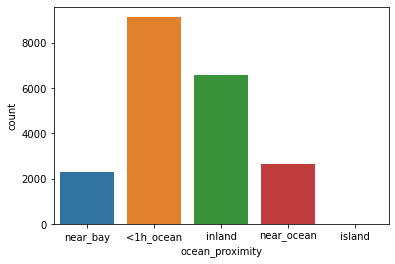

In [13]:
import seaborn as sns
sns.countplot(x=df.ocean_proximity)
plt.show

In [18]:
mean_value=df.median_house_value.mean()

In [21]:
df['above_average'] = df['median_house_value'].apply(lambda x: '1' if x <= mean_value else '0')

In [22]:
df['above_average']

0        0
1        0
2        0
3        0
4        0
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: above_average, Length: 20640, dtype: object

In [45]:
feature=['total_bedrooms', 'households', 'total_rooms', 'population','population_per_household']

In [46]:
corrMatrix=df[feature].corr()
corrMatrix

,total_bedrooms,households,total_rooms,population,population_per_household
total_bedrooms,1.000000,0.966507,0.920196,0.866266,-0.028019
households,0.966507,1.000000,0.918484,0.907222,-0.027309
total_rooms,0.920196,0.918484,1.000000,0.857126,-0.024581
population,0.866266,0.907222,0.857126,1.000000,0.069863
population_per_household,-0.028019,-0.027309,-0.024581,0.069863,1.000000


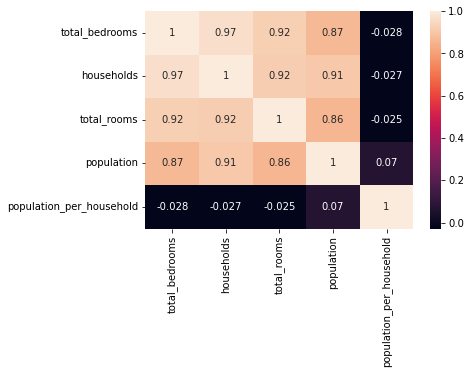

In [47]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [142]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'above_average',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [51]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [52]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [54]:
df_train= df_train.reset_index(drop=True)
df_val= df_val.reset_index(drop=True)
df_test= df_test.reset_index(drop=True)

In [56]:
y_train= df_train.above_average.values
y_val= df_val.above_average.values
y_test= df_test.above_average.values


In [58]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [59]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']


In [148]:
df_train.shape, df_val.shape, df_test.shape

((12384, 11), (4128, 12), (4128, 12))

In [147]:
df_val.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household'],
      dtype='object')

In [60]:
from sklearn.metrics import mutual_info_score

In [80]:
score=mutual_info_score(df_full_train.ocean_proximity, df_full_train.above_average)
round(score,3)

0.103

In [81]:
from sklearn.feature_extraction import DictVectorizer

In [82]:
train_dicts= df_train. to_dict(orient='records')

In [83]:
dv= DictVectorizer(sparse=False)

In [84]:
dv.fit(train_dicts)
X_train = dv.transform(train_dicts)

In [85]:
X_train.shape, y_train.shape

((12384, 16), (12384,))

In [86]:
val_dicts= df_val. to_dict(orient= 'records')

In [87]:
X_val=dv.fit_transform(val_dicts)

In [88]:
X_val.shape, y_val.shape

((4128, 16), (4128,))

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
model= LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [92]:
model.coef_

array([[-3.30800847e-01, -5.43264104e-03, -3.65857641e-02,
        -1.43383384e-01, -9.69464940e-02, -1.21280324e+00,
        -5.16710212e-01,  1.87513142e+00, -6.48837019e-02,
        -2.27805721e-01, -9.51888158e-01,  1.72501636e-03,
        -4.55430348e-03, -1.34543114e-02, -3.21588502e-04,
         6.10165992e-05]])

In [93]:
model.intercept_

array([0.11384362])

In [117]:
model.predict(X_train)

array(['1', '1', '1', ..., '0', '1', '1'], dtype=object)

In [118]:
y_pred= model.predict_proba(X_val)[:, 1]
y_pred

array([5.51090313e-03, 5.57697659e-04, 9.79322862e-01, ...,
       6.68412019e-02, 2.25826540e-01, 3.62820916e-01])

In [119]:
above_average_decision = (y_pred>=0.5)

In [120]:
above_average_decision=above_average_decision.astype(int)
above_average_decision

array([0, 0, 1, ..., 0, 0, 0])

<AxesSubplot:ylabel='count'>

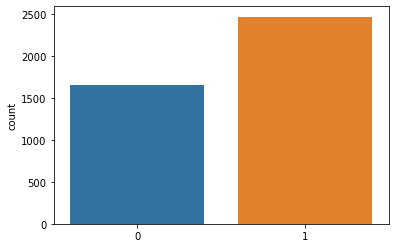

In [122]:
sns.countplot(x=above_average_decision)

<AxesSubplot:ylabel='count'>

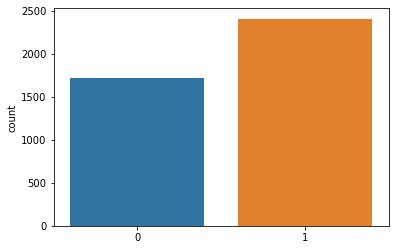

In [123]:
sns.countplot(x=y_val)

In [125]:
df_pred=pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = above_average_decision.astype(int)
df_pred['actual']= y_val

In [126]:
df_pred['correct']= df_pred.prediction==df_pred.actual
df_pred

,probability,prediction,actual,correct
0,0.005511,0,0,False
1,0.000558,0,0,False
2,0.979323,1,1,False
3,0.094559,0,0,False
4,0.905775,1,1,False
...,...,...,...,...
4123,0.787326,1,0,False
4124,0.868461,1,1,False
4125,0.066841,0,0,False
4126,0.225827,0,0,False


In [127]:
df_pred['actual']=df_pred['actual'].astype('int')

In [128]:
df_pred.dtypes

probability    float64
prediction       int32
actual           int32
correct           bool
dtype: object

In [129]:
df_pred['correct']= df_pred.prediction==df_pred.actual
df_pred

,probability,prediction,actual,correct
0,0.005511,0,0,True
1,0.000558,0,0,True
2,0.979323,1,1,True
3,0.094559,0,0,True
4,0.905775,1,1,True
...,...,...,...,...
4123,0.787326,1,0,False
4124,0.868461,1,1,True
4125,0.066841,0,0,True
4126,0.225827,0,0,True


In [130]:
(df_pred['actual']==df_pred['prediction']).mean()

0.8234011627906976

In [136]:
accuracy=df_pred.correct.value_counts(normalize=True)
round(accuracy,2)

True     0.82
False    0.18
Name: correct, dtype: float64

In [139]:
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_bedrooms',
       'population', 'households', 'median_income', 'ocean_proximity',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [141]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'above_average',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household'],
      dtype='object')